In [2]:
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_csv('heights.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [5]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

__Plots__

<AxesSubplot:xlabel='height', ylabel='Count'>

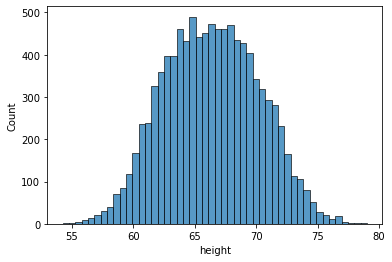

In [6]:
sn.histplot(df.height) #hist without kde= True(does not plot the curve)

<AxesSubplot:xlabel='height', ylabel='Count'>

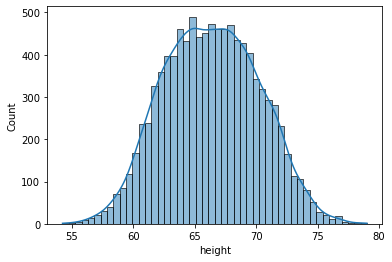

In [7]:
sn.histplot(df.height,kde=True) #hist with kde= True (plots the curve)

__Lower and upper limit for outliers__

In [10]:
mean= df.height.mean()
mean

66.3675597548656

In [11]:
std = df.height.std()
std

3.847528120795573

In [15]:
lower_limit = mean - 3*std # lower limit for outlier
lower_limit

54.824975392478876

In [16]:
upper_limit = mean + 3*std # upper limit for outlier
upper_limit

77.91014411725232

__Removing Outliers on the basis of upper and lower limits__

In [17]:
df[df.height<lower_limit] #these are the lower outliers

,gender,height
6624,Female,54.616858
9285,Female,54.263133


In [18]:
df[df.height>upper_limit] #these are the upper outliers

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [20]:
df_no_outliers = df[(df.height>lower_limit) & (df.height<upper_limit)] #creating clean dataset with no outliers
df_no_outliers

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [21]:
df.shape

(10000, 2)

In [22]:
df_no_outliers.shape

(9993, 2)

__Z_score- Outlier Removal__

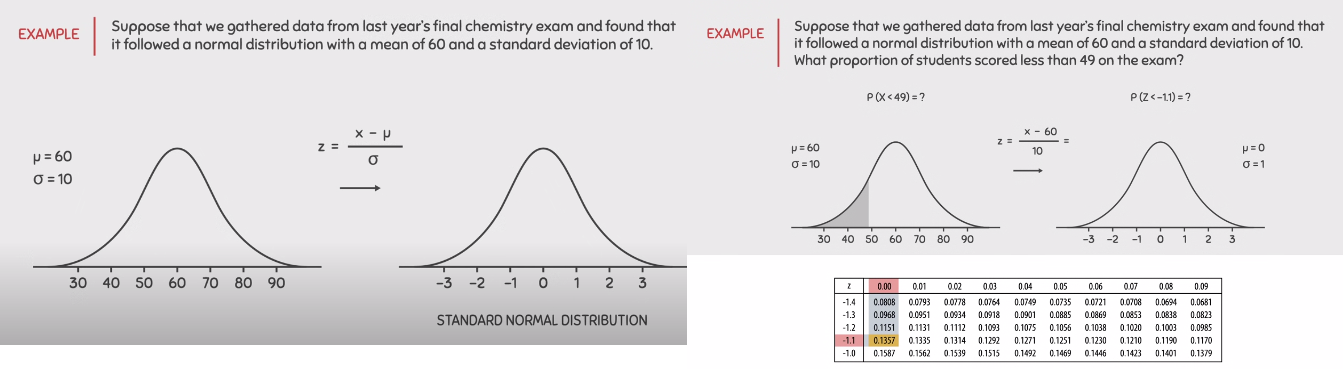

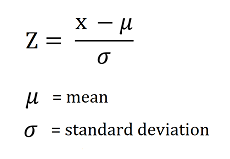

In [23]:
df['z_score'] = (df.height - mean)/std
df

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [28]:
df_Z_no_oulier = df[(df['z_score']>-3) &(df['z_score']<3)]
df_Z_no_oulier

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [29]:
df_Z_no_oulier.shape # outliers removed using z-score

(9993, 3)

In [30]:
df_no_outliers.shape # outliers removed using standard deviation

(9993, 2)

___Z-score Method also removed the same outliers as before___